# Homework 1 – $k$-NN Classifier

Welcome to the first homework in INF264 where we will explore the $k$ nearest neighbors ($k$-NN) classifier.

Since this is the first homework, we are going to be real nice and provide partial solutions. The parts where you need to do some work are indicated with a comment `#TODO!` in the code.

#### Overview

1. In the first part, we will use a implementation of a $k$-NN classifier from `sklearn`. We will use validation data to pick the optimal value for $k$ and in the end evaluate our final classifier on some unseen test data.

2. In the second part, we will visualize how our classifier makes decisions. We will do this for different values of $k$ and try to understand how $k$ affects the decision making.

3. That third and last part is a bonus exercise where you implement your own $k$-NN classifier from scratch.

Let us start by importing NumPy and Matplotlib. We will need these for sure.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1 – Training and evaluating a $k$-NN classifier using `sklearn`

In this first part, we are going to use the `sklearn` implementation of a $k$-NN classifier to classify different species of the flower Iris based on two measurements.

We can load the Iris dataset using `load_iris()` from `sklearn`. This returns a Python dictionary containing the dataset. The most important keys in this dictionary are:

- `data` : A 2-dimensional floating point NumPy array of shape (150, 4) containing the features of individual Iris flowers (each row corresponds to a single flower and the different columns correspond to the four measurements).
- `target` :  A 1-dimensional integer NumPy array of shape (150,) containing the labels (the type of Iris flower).
- `target_names` : A list of strings of the class names `["setosa" "versicolor" "virginica"]`.
- `feature_names` : A list of strings of the feature names `["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]`.

**Your tasks:**

1. Import the function `load_iris` from the module `sklearn.datasets`.
2. Call `load_iris()` and store the dataset in a new variable called `dataset`.
3. Store the two first columns of `dataset.data` in a variable `X` (our features).
4. Store the labels `dataset.target` in a variable `y`.

In [16]:
from sklearn.datasets import load_iris;

dataset = load_iris() 

print(f"Loaded Iris dataset with features:\n\t{dataset.feature_names}\nand targets:\n\t{dataset.target_names}")

X = dataset.data[:,:2] #TODO! Extract the first two columns/features from the dataset
y = dataset.target #TODO! Extract the target values from the dataset

print(f"X has shape {X.shape}, and y has shape {y.shape}")

Loaded Iris dataset with features:
	['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
and targets:
	['setosa' 'versicolor' 'virginica']
X has shape (150, 2), and y has shape (150,)


We now want to split the dataset into three smaller ones. Namely, training data, validation data and testing data. These serves the following purposes:

- **Training data** is used to train our $k$NN classifier (learning).
- **Validation data** is used to tune the classifier (finding the best value for $k$ in this case).
- **Test data** is not used during the training and is used to evaluate the final classifier on unseen data (giving us an estimate of how well our classifier will perform on new data).

**Your tasks:**
Split the dataset into 70% training data, and 15% for both validation and test data. To achieve this, we will use `train_test_split()` ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) from `sklearn` twice.

Features for training, validation and test data should be stored in variables named `X_train`, `X_val` and `X_test`, respectively. The labels/targets should be stored in variables named `y_train`, `y_val` and `y_test`.

In [17]:
from sklearn.model_selection import train_test_split

train_test_split

X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y, test_size=0.3
) # Split the data into training and testing+validation sets
X_test, X_val, y_test, y_val = train_test_split(
    X_val_test, y_val_test, test_size=0.5
) # Split the testing+validation set into testing and validation sets

print(f"Training data: {len(X_train)} rows.")
print(f"Validation data: {len(X_val)} rows.")
print(f"Testing (unseen) data: {len(X_test)} rows.")

Training data: 105 rows.
Validation data: 23 rows.
Testing (unseen) data: 22 rows.


Let us plot the training data points using a scatter plot with different colors for each class. 

**Your task:** Try to understand the code below by writing a comment at the end of each line explaining what it does.

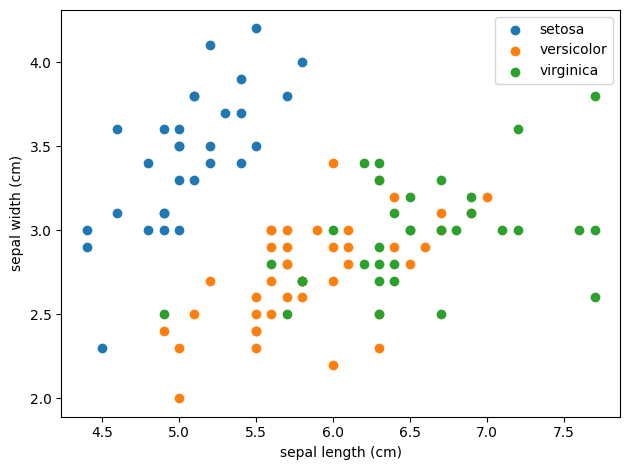

In [18]:
fig, ax = plt.subplots() # creates a figrue and an axis object

for target in range(3): # we know that there is 3 classes in the dataset
    class_name = dataset.target_names[target] # gets the name of the class
    ax.scatter(*X_train[y_train == target].T, label=class_name) 
    # plot the points as a scatter plot where x is the first column, y is the second column, 
    # size is the third column, and color is the fourth column

ax.set_xlabel(dataset.feature_names[0]) # set the x-axis label as the first feature name
ax.set_ylabel(dataset.feature_names[1]) # set the y-axis label as the second feature name
ax.legend()
fig.tight_layout() 
plt.show()

**Your tasks:**

First, import the `KNeighborsClassifier` class from `sklearn.neighbors`.

Then, for each distinct value of $k$, 

1. Create a classifier and fit it to the training data.
2. Make predictions on the training data, compute the accuracy and append it to the list `training_accuracies`.
3. Make predictions on the validation data (not used for training the classifier), compute the accuracy and append it to the list `validation_accuracies`.

**Hints:**

- You can create a classifier instance `clf` as follows: `clf = KNeighborsClassifier(n_neighbors=k)`.
- Call `clf.fit(X_train, y_train)` to fit the classifier (training).
- Calling `clf.score(X, y)` will use the fitted classifier to predict the labels based on `X`, compare the predictions with `y` and return the accuracy (percentage of correct predictions).

**Warning:** When calling `clf.score()` make sure the features `X` and the labels `y` correspond to eachother. That is, calling `clf.score(X_val, y_train)` is wrong (and might not even throw an error if they are of the same length).

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30]
#ks = range(1, 31)
validation_accuracies = []
training_accuracies = []
metric = 'minkowski' # 'chebyshev' 'manhattan' 'minkowski'
weights = 'uniform' # 'distance' 'uniform'

for k in  ks:
    clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric)
    clf.fit(X_train, y_train)
    acc = clf.score(X_train, y_train)
    training_accuracies.append(acc) 

    acc = clf.score(X_val, y_val)
    validation_accuracies.append(acc) 

**Your task:** Plot both the training and validation accuracies obtained in the previous step as functions of $k$. We label the axes and use labels and a legend to make the visualization easy to understand.

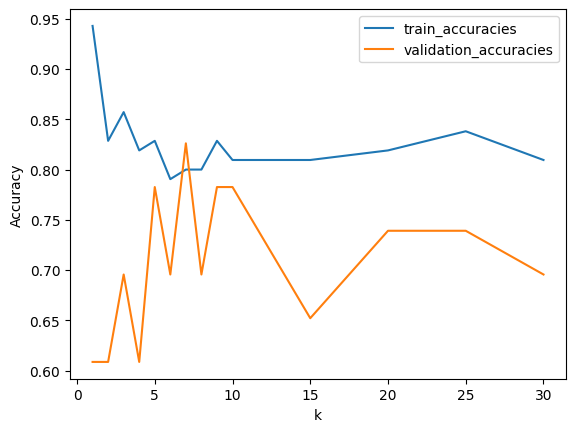

In [20]:
fig, ax = plt.subplots()

ax.plot(ks, training_accuracies, label="train_accuracies")
ax.plot(ks, validation_accuracies, label="validation_accuracies")

ax.legend()
ax.set_xlabel("k")
ax.set_ylabel("Accuracy")
plt.show()

We see that the training accuracy when $k=1$ is not $100\%$. The reason for this is that there exist duplicate data points with different labels so the classifier has to chose one. Which one is chosen depends on the ordering of the training data when using the `sklearn` implementation.

**Your task:** Use `np.argmax()` to find the value for $k$ that gave us the highest *validation* accuracy. *Not the training accuracy, because that is always $k=1$ (why?).*

In [21]:
best_idx = np.argmax(validation_accuracies) # Find the index of the highest validation accuracy
print(k)
best_k = ks[best_idx] # Find the k value that gave the highest validation accuracy by using the index found above
print(best_k)
best_accuracy = validation_accuracies[best_idx] # Find the highest validation accuracy, again using the index found above

print(f"The best validation accuracy achieved was {best_accuracy * 100:.3f}% when k={best_k}.")

30
7
The best validation accuracy achieved was 82.609% when k=7.


We have now chosen the optimal value for $k$ based on the performance on validation data and stored it in the variable `best_k`.

Let us train a $k$-NN classifier with this optimal $k$ value and see how it perform on the unseen test data. 

**Your tasks:**

1. Merge the training and validation data since we are done with using our validation data.
2. Fit the classifier on the merged dataset using `clf.fit()`.
3. Use `clf.score()` to compute the test accuracy.
   
Note that evaluating on validation data (validation accuracy) gives a very optimistic estimate of the real accuracy since we used it to decide what $k$ should be. The test data however, have not been used for making any decisions about our final model and should give us a more realistic estimate of the model's performance on new data.

In [22]:
X_train_and_val = np.concatenate((X_train, X_val)) # Concatenate the training and validation data features
y_train_and_val = np.concatenate((y_train, y_val)) # Concatenate the training and validation data targets

clf = KNeighborsClassifier(n_neighbors=best_k, weights=weights, metric=metric) # Create a KNeighborsClassifier with the best k value
clf.fit(X_train_and_val, y_train_and_val) # Fit the classifier to the training and validation data (merged)
test_accuracy = clf.score(X_test, y_test) # Calculate the accuracy of the classifier on the unseen test data

print(f"Final accuracy on unseen test data: {test_accuracy * 100:.3f}%.")

Final accuracy on unseen test data: 90.909%.


## Part 2 – Plotting decision boundaries as $k$ varies

In this part, we are going to visualize how the fitted $k$-NN classifier decides which class a sample belongs to.

The idea is to create a uniform grid of points in the plane, classify each of these points using our classifier, and then color them based on the prediction we get.

We want to make a pretty visualization, so we start by an example of how one can create custom color maps with `matplotlib`.

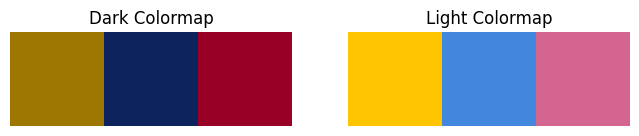

In [23]:
import matplotlib.colors as mcolors

dark_cmap = mcolors.ListedColormap(["#9E7702", "#0C235D", "#980026"])
light_cmap = mcolors.ListedColormap(["#FFC500", "#4286DE", "#D46591"])

# Preview the colormaps
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].imshow([[0, 1, 2]], cmap=dark_cmap)
axs[0].set_title("Dark Colormap")
axs[0].axis("off")
axs[1].imshow([[0, 1, 2]], cmap=light_cmap)
axs[1].set_title("Light Colormap")
axs[1].axis("off")
plt.show()

So pretty!

Next, we are going to write a function `plot_knn_decision_boundaries(X_train, y_train, X_val, y_val, clf, ax, resolution=0.05)` that takes in 
- Training and validation data (features) `X_train` and `X_val`,
- corresponding labels `y_train` and `y_val`, 
- a fitted classifier instance `clf`, 
- and an axis object `ax`.

**Your task:** The function is partially complete, but there is one thing you need to do. Namely, classify the points on the grid using the given classifier `clf`. See the line with the `#TODO!` comment.

In [24]:
# Function for plotting data points together with kNN classifier's decision boundaries
def plot_knn_decision_boundaries(X_train, y_train, X_val, y_val, clf, ax, resolution=0.05):
    dark_cmap = mcolors.ListedColormap(["#9E7702", "#0C235D", "#980026"])
    light_cmap = mcolors.ListedColormap(["#FFC500", "#4286DE", "#D46591"])

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    Z = clf.predict(grid) # Use the classifier to predict the class of each point in the grid

    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=light_cmap, zorder=1, norm=mcolors.NoNorm())

    for target in range(3):
        class_name = dataset.target_names[target]
        ax.scatter(*X_train[y_train == target].T, label=f"{class_name} (train)", color=dark_cmap(target), edgecolor="black", zorder=2, marker="o")
        ax.scatter(*X_val[y_val == target].T, label=f"{class_name} (val)", color=dark_cmap(target), edgecolor="black", zorder=2, marker="s")

    ax.set_xlabel(dataset.feature_names[0])
    ax.set_ylabel(dataset.feature_names[1])
    ax.legend()

Let us test our function. 

**Your tasks:**

Let `k` loop over `[1, 5, 10, 25, 50, 75, 100]`. For each iteration, 

1. Fit a $k$-NN classifier on the training data using `KNeighborsClassifier` with `n_neighbors=k`,
2. Use `plot_knn_decision_boundaries` to plot the data points and the decision boundaries.

Note that this code can take some seconds to finish because of the plotting function.

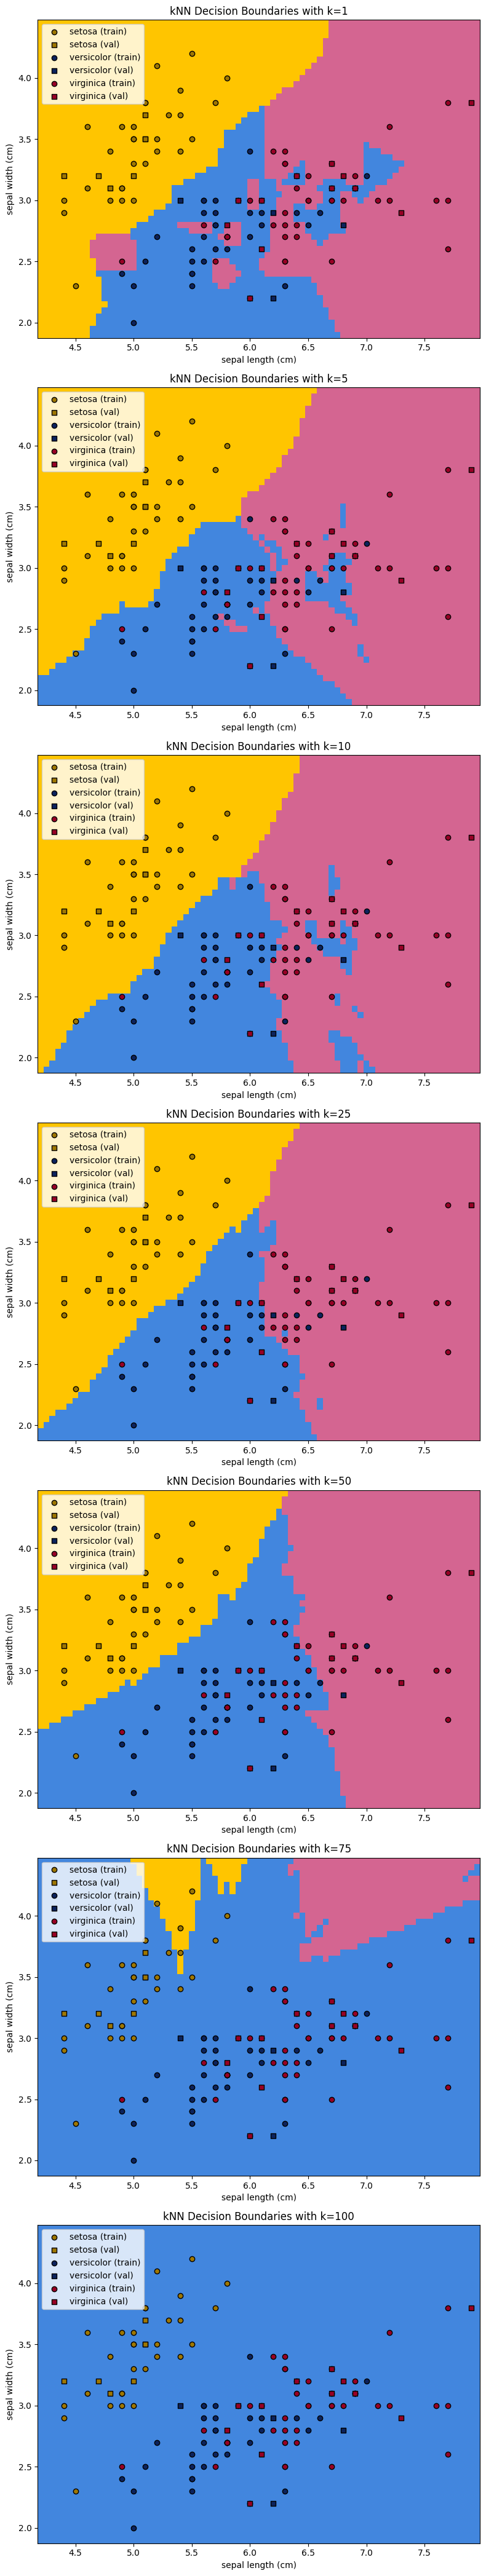

In [25]:
ks = [1, 5, 10, 25, 50, 75, 100]
fig, axs = plt.subplots(nrows=len(ks), ncols=1, figsize=(8, 6 * len(ks)))

for k, ax in zip(ks, axs):
    clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric) # Create a KNeighborsClassifier with k neighbors
    clf.fit(X_train, y_train) # Fit the classifier to the training data
    plot_knn_decision_boundaries(X_train, y_train, X_val, y_val, clf, ax) # Plot the decision boundaries on the current axis using the function we defined above
    ax.set_title(f"kNN Decision Boundaries with k={k}")

fig.tight_layout()
plt.show()

Two things we should think about are:

**Q1:** How does the decision boundaries change as `k` increases?

**Q2:** Why does the classifier never predict one of the classes when `k=100`?

---

As a last experiment in this part, let us fit a classifier with `k` being equal to the number of samples in the training data.

**Your task:** Fit a $k$-NN classifier with `k` being equal to the number of samples in the training data. That is, use `len(y_train)` as $k$. Then, as above, plot the decision boundaries and data points.

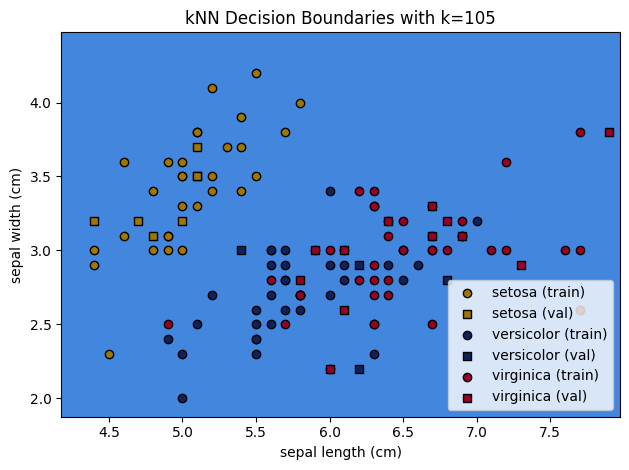

In [26]:
fig, ax = plt.subplots()

k = len(y_train) # Let k be equal to the number of training samples
clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric) # Create a KNeighborsClassifier with k neighbors and fit it to the training data
clf.fit(X_train, y_train)

plot_knn_decision_boundaries(X_train, y_train, X_val, y_val, clf, ax)
ax.set_title(f"kNN Decision Boundaries with k={k}")
fig.tight_layout()
plt.show()

**Q:** What do you observe and why does this happen?

## Part 3 (bonus) – Implementing your own $k$-NN classifier from scratch

If you really like to test your understanding of the $k$-NN classifier, here is an extra challenge for you:

1. Using only functions from NumPy and `KDTree` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html)) from `scipy.spatial`, create your own $k$-NN classifier.
2. Fit the classifier on training data (you can use the best value for $k$ that you previously found).
3. Evaluate your classifier on the test data by computing the accuracy.
4. Compare your test accuracy to the `sklearn` implementation.

**Hints:**

- It can be useful to define a class for your $k$-NN classifier.
- Fitting a $k$-NN classifier is simply storing the training features and labels (all the magic happens at prediction time).
- For prediction, use `KDTree` to find the $k$ nearest neighbors of each point in `X_test`.
- To predict, you can use `np.bincount()` together with `np.argmax()` to find the majority class among the $k$ nearest neighbors.
- To predict without using a for-loop, you can consider using `np.apply_along_axis()`.
- To make your classifier class compatible with `sklearn` syntax, include the following four methods in your class implementation:
  - `__init__(self, k)` (return nothing)
  - `fit(self, X_train, y_train)` (return nothing)
  - `predict(self, X_test)` (return predicted labels)
  - `score(self, X_test, y_test)` (return accuracy as float)

In [27]:
from scipy.spatial import KDTree



class KNNClassifier:
    def __init__(self, k):
        self.k = k # Store the number of neighbors to consider
        ... #TODO! Store the number of neighbors to consider and initialize any other variables you might need

    def fit(self, X_train, y_train):
        self.X_train = X_train # Store the training data features
        self.y_train = y_train  # Store the training data targets
        ... #TODO! Store the training data features and targets in the class

    def predict(self, X_test):
        kdtree = KDTree(self.X_train)
        dd, ii = kdtree.query(X_test, k=self.k)
        predictions = []
    
        for i in ii:
            labels = self.y_train[i]
            unique, counts = np.unique(labels, return_counts=True)
            predictions.append(unique[counts.argmax()])
            
        return predictions
        ... #TODO! Implement the prediction logic using a KDTree and return the predictions
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        length = len(predictions)
        similar = 0;
        for i in range(length):
            if y_test[i] == predictions[i]:
                similar += 1
        return similar/length 
        ... #TODO! Implement the scoring logic using the predict function and return the accuracy


In [28]:
kkn = KNNClassifier(best_k)

kkn.fit(X_train, y_train)

kkn.score(X_test, y_test)

#TODO! Test the KNNClassifier on test data using the best k value found earlier and print the accuracy

0.9090909090909091